In [9]:
%run D:\Work\TrendAnalysis/scripts/data_preprocessing.py

[*********************100%***********************]  1 of 1 completed

Data saved to ../data/preprocessed_stock_data.csv


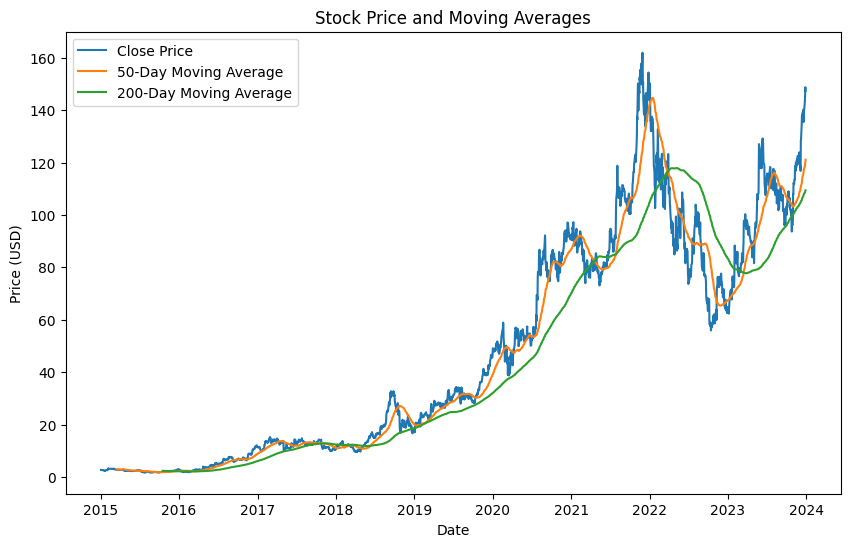

D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2264
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4850.673
Date:                Sun, 13 Oct 2024   AIC                           9713.346
Time:                        16:42:23   BIC                           9747.693
Sample:                             0   HQIC                          9725.879
                               - 2264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0411      0.014     -3.027      0.002      -0.068      -0.014
ar.L2          0.0025      0.011      0.225      0.822      -0.020       0.025
ar.L3         -0.0097      0.012     -0.792      0.4

D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\work\TrendAnalysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


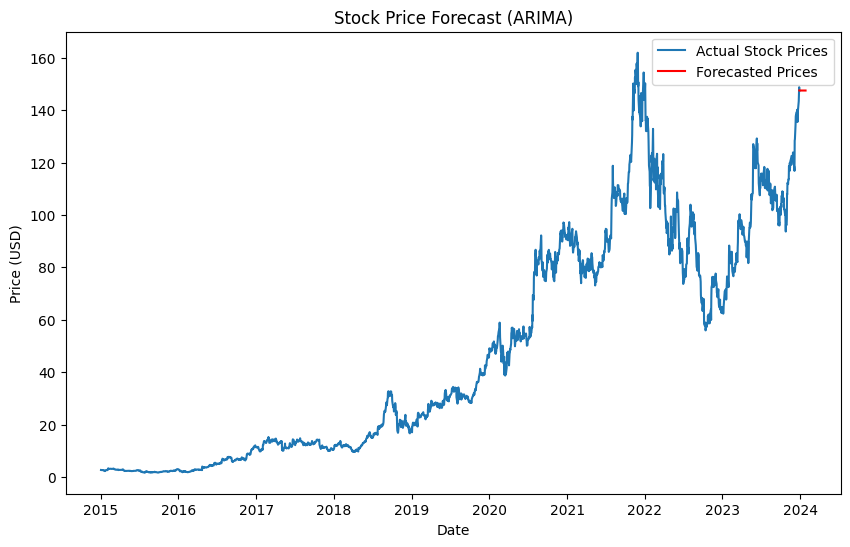

In [11]:
# Import libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load preprocessed stock data
df = pd.read_csv('../data/preprocessed_stock_data.csv', index_col='Date', parse_dates=True)

# Plot the close price and moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_50'], label='50-Day Moving Average')
plt.plot(df['MA_200'], label='200-Day Moving Average')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Train ARIMA model
arima_order = (5, 1, 0)  # Example ARIMA(p, d, q)
model = ARIMA(df['Close'], order=arima_order)
arima_model = model.fit()

# Print summary of the model
print(arima_model.summary())

# Forecast future stock prices
forecast_steps = 30  # Number of days to forecast
forecast = arima_model.forecast(steps=forecast_steps)

# Plot the forecasted results
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Actual Stock Prices')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecasted Prices', color='red')
plt.title('Stock Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()